In [1]:
import numpy as np # linear algebra
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [4]:
! python --version


Python 3.9.15


'numpy' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
np. __version__

'1.23.5'

In [9]:
import matplotlib
print(matplotlib.__version__)


3.6.2


In [10]:
matplotlib.__version__

'3.6.2'

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [13]:
df = pd.read_csv("C:/Users/Yogesh Dhumal/Downloads/full_data.csv")

In [14]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [15]:
target = 'stroke'
X = df.loc[:,df.columns!=target]
y = df.loc[:,df.columns==target]

In [16]:
columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']
X = pd.get_dummies(X[columns])

0    4733
1     248
Name: stroke, dtype: int64


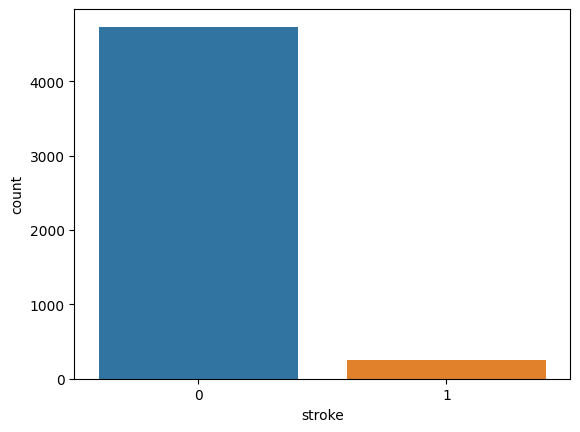

In [17]:
ax = sns.countplot(x=target,data=df)
print(df[target].value_counts())

In [18]:
percentage_no_stroke = 100*(4733/float(df.shape[0]))
percentage_no_stroke

95.0210801043967

In [19]:
percentage_yes_stroke = 100*(248/float(df.shape[0]))
percentage_yes_stroke

4.978919895603292

In [24]:
!pip install imblearn

     -------------------------------------- 258.3/258.3 kB 8.0 MB/s eta 0:00:00


In [26]:
import seaborn as sns
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
#import imblearn.over_sampling.SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

1    4733
0    4733
Name: stroke, dtype: int64


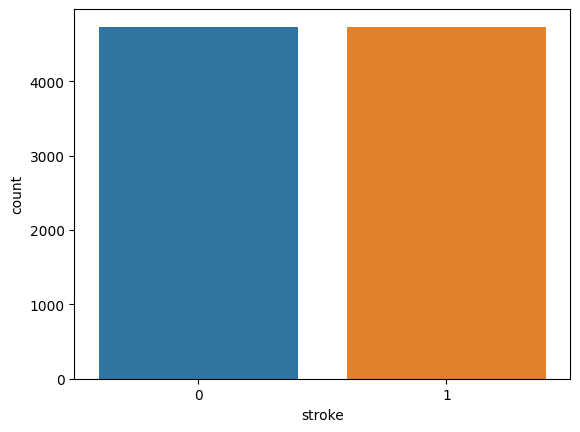

In [27]:
ax = sns.countplot(x=target,data=y)
print(y[target].value_counts())

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.20, shuffle=True)

In [30]:
from sklearn.ensemble import RandomForestClassifier

rndforest = RandomForestClassifier(n_estimators=250, n_jobs=-1)
rndforest.fit(X_train, Y_train)

C:\Users\Yogesh Dhumal\AppData\Local\Temp\ipykernel_69428\150702573.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rndforest.fit(X_train, Y_train)


RandomForestClassifier(n_estimators=250, n_jobs=-1)

In [ ]:
# def rf(X_train, Y_train, n_estimators=250):
#  rndforest = RandomForestClassifier(n_estimators=n_estimators, n_jobs=-1)
#  rndforest.fit(X_train, Y_train)
#  return rndforest

In [33]:
Y_pred = rndforest.predict(X_test)

# LABELS = ['STROKE', 'NO_STROKE']
# plot_confusion_matrix(random_forest_en, X_train, Y_train, class_names=LABELS, file_name='ConfussionMatrix', normalize=True)

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test, Y_pred)
print(cm)


[[976  13]
 [ 27 878]]


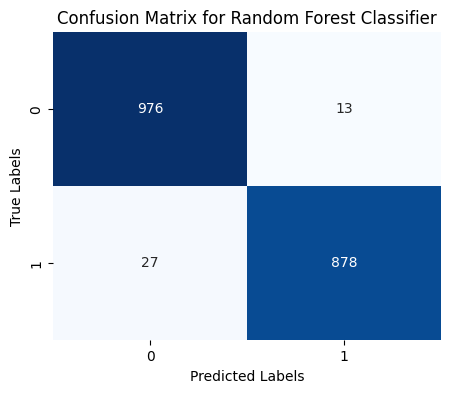

In [37]:

# Optional: Visualize the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()


In [39]:
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       989
           1       0.99      0.97      0.98       905

    accuracy                           0.98      1894
   macro avg       0.98      0.98      0.98      1894
weighted avg       0.98      0.98      0.98      1894



In [40]:
!pip freeze > requirements.txt


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [43]:
# Initialize models with default parameters (you can customize these)
log_reg = LogisticRegression(max_iter=1000)  # max_iter increased for convergence
decision_tree = DecisionTreeClassifier()
xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss')


C:\Users\Yogesh Dhumal\.conda\envs\acpl\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [44]:
# Logistic Regression
log_reg.fit(X_train, Y_train)
Y_pred_log_reg = log_reg.predict(X_test)

# Decision Tree
decision_tree.fit(X_train, Y_train)
Y_pred_decision_tree = decision_tree.predict(X_test)

# XGBoost
xgboost.fit(X_train, Y_train)
Y_pred_xgboost = xgboost.predict(X_test)


C:\Users\Yogesh Dhumal\.conda\envs\acpl\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix for Logistic Regression:
 [[982   7]
 [ 57 848]]

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       989
           1       0.99      0.94      0.96       905

    accuracy                           0.97      1894
   macro avg       0.97      0.96      0.97      1894
weighted avg       0.97      0.97      0.97      1894



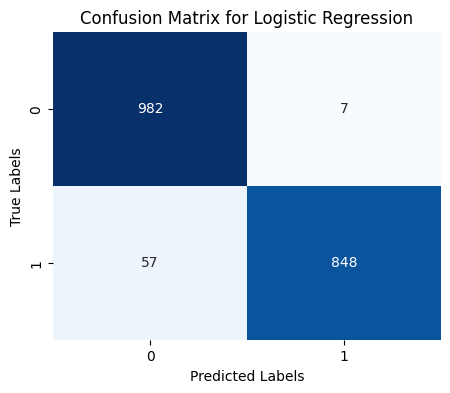

Confusion Matrix for Decision Tree:
 [[910  79]
 [ 37 868]]

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       989
           1       0.92      0.96      0.94       905

    accuracy                           0.94      1894
   macro avg       0.94      0.94      0.94      1894
weighted avg       0.94      0.94      0.94      1894



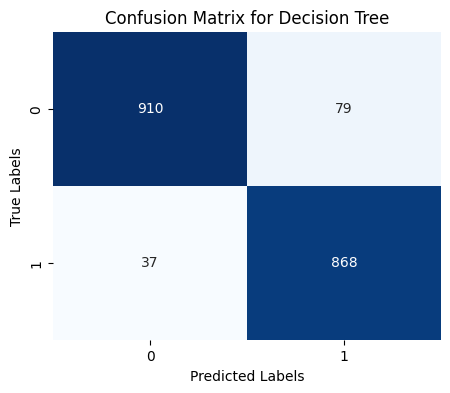

Confusion Matrix for XGBoost:
 [[966  23]
 [ 27 878]]

Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       989
           1       0.97      0.97      0.97       905

    accuracy                           0.97      1894
   macro avg       0.97      0.97      0.97      1894
weighted avg       0.97      0.97      0.97      1894



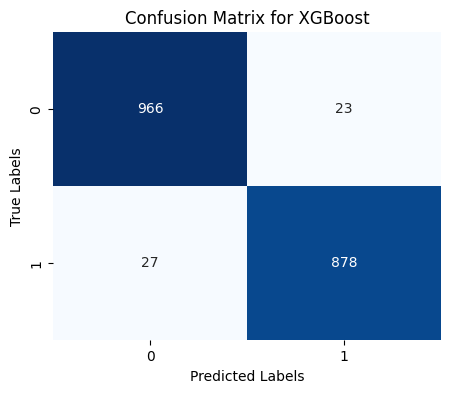

In [45]:
# Function to display confusion matrix and classification report
def evaluate_model(Y_test, Y_pred, model_name):
    cm = confusion_matrix(Y_test, Y_pred)
    print(f"Confusion Matrix for {model_name}:\n", cm)
    print(f"\nClassification Report for {model_name}:\n", classification_report(Y_test, Y_pred))
    
    # Visualization
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

# Evaluate each model
evaluate_model(Y_test, Y_pred_log_reg, "Logistic Regression")
evaluate_model(Y_test, Y_pred_decision_tree, "Decision Tree")
evaluate_model(Y_test, Y_pred_xgboost, "XGBoost")


In [47]:
!git clone https://github.com/yogeshdhumal/Brain-Stroke.git

Cloning into 'Brain-Stroke'...


In [48]:
pwd

'C:\\Users\\Yogesh Dhumal'